# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

Uma empresa de empréstimo de automóveis está passando por uma situação muito complicada. Ela está com uma alta demanda para uma frota reduzida e uma alta taxa de clientes inadimplentes, ou seja, clientes que não pagam o empréstimo no tempo devido.

- Alta demanda
- Frota reduzida
- Inadimplência

Isso está gerando um grande prejuízo para a empresa. E nós fomos contratados para ajudar a melhorar essa situação da empresa, para identificar esses clientes inadimplentes antes mesmo da empresa conceder o empréstimo do veículo.

Para resolver essa situação, essa empresa nos forneceu uma base de dados em formato CSV com dados históricos de clientes inadimplentes. Vamos utilizar essa base de dados para construir um modelo de inteligência artificial que vai conseguir classificar os clientes entre adimplentes e inadimplentes.

Para começar o projeto, vamos utilizar o Google Colab, que já possui todas as ferramentas necessárias para a construção do nosso projeto.

Vamos abrir aqui o Google Colab e o primeiro passo é fazer o upload da base de dados.

Vamos clicar no menu lateral esquerdo de arquivos e selecionar a opção "Fazer upload para o armazenamento da sessão".

Será aberto o explorador de arquivos do computador e vamos selecionar o arquivo emp_automovel.csv.

O arquivo emp_automovel.csv será disponibilizado na atividade "Preparando o ambiente". Antes de começar, volte até a atividade e baixe esse arquivo.

Com o upload do arquivo para o Google Colab feito, podemos importar a biblioteca pandas, que será utilizada para fazer a leitura desse arquivo. Mas antes, vamos copiar o caminho do arquivo no menu lateral. Clique com o botão direito no arquivo emp_automovel.csv e selecione a opção "Copiar caminho". Feito isso, podemos fechar o menu de arquivos e importar a biblioteca pandas, que já vem instalada no Google Colab.

Na primeira célula, vamos escrever import pandas as pd e vamos executar esse código com "Ctrl + Enter".

In [1]:
import pandas as pd

Então, com o código já executado e a biblioteca importada, vamos fazer a leitura da base de dados. Na próxima célula, vamos escrever dados = pd.read_csv(), que é a função que será utilizada para fazer a leitura do arquivo em formato CSV. Dentro dos parênteses, vamos passar uma string vazia e apertar o atalho "Ctrl + V", que vai colar o caminho do arquivo que foi copiado no menu de arquivos. Agora, podemos executar esta célula para fazer a leitura da base de dados.

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/classificacao-validacao-modelos-metricas-avaliacao/dados/emp_automovel.csv')

In [4]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


Na próxima célula, vamos explorar esses dados para identificar quais tipos de informação temos nesse arquivo. Então, escrevemos dados na próxima célula e executamos o código.

Depois de executar o código, obtemos uma tabela com diversas informações a respeito dos clientes. Essas informações são históricas, ou seja, informações passadas a respeito desses clientes.

Temos as colunas de receita do cliente, anuidade do empréstimo, os anos de casa proprietário e assim por diante. A última coluna dessa base de dados é a coluna "inadimplente" que informa se o cliente pagou o empréstimo ou não.

O valor 0 indica que o cliente pagou o empréstimo no tempo devido. E o valor 1 significa que o cliente é inadimplente, ou seja, não pagou o empréstimo do veículo.

Todas as informações que temos a respeito desses clientes estão em formato numérico. Isso é muito importante para os algoritmos de inteligência artificial porque eles só conseguem compreender informações numéricas. Além disso, essa base de dados já veio totalmente tratada, então não precisaremos fazer nenhum tratamento nessa base de dados.

Tudo que precisamos fazer aqui é executar um algoritmo que selecionaremos, que será o de árvore de decisão.

Mas antes de fazermos isso, vamos separar as variáveis, as colunas das variáveis explicativas, ou seja, são as informações que explicam o padrão dos dados, e a variável "inadimplente". Então, vamos colocar essa variável separada das demais, que é a variável alvo. É a classe que estamos querendo identificar, que nós queremos classificar com nosso algoritmo de inteligência artificial.

Na próxima célula, primeiramente faremos essa divisão das variáveis explicativas e da variável alvo. Vamos chamar as variáveis explicativas de "X", escreveremos:

As variáveis explicativas serão todas as colunas da base de dados, com exceção da coluna "inadimplente". Assim, vamos utilizar o método drop() para remover essa coluna "inadimplente".

Então, como parâmetro da função 'drop', vamos passar 'Inadimplente', entre aspas. Além disso, como segundo parâmetro, axis = 1, para identificar que essa remoção está ocorrendo nas colunas da base de dados.

Na mesma célula, vamos separar também a variável alvo, que chamaremos de "Y". Então, escreveremos Y = dados[‘inadimplente’]. Estamos selecionando justamente a coluna 'Inadimplente'. Agora podemos executar essa célula com "Ctrl + Enter". Desta forma, os dados serão divididos, separados entre variável alvo e variáveis explicativas.

In [6]:
x = dados.drop('inadimplente', axis = 1)
y = dados ['inadimplente']

### Árvore de decisão

Agora, iremos utilizar o algoritmo de Árvores de Decisão, que toma decisões baseadas no padrão dos dados para classificar os clientes entre adimplente e inadimplente.

Para isso, primeiramente, é necessário fazer a importação do método, da função capaz de executar esse algoritmo. Esse algoritmo está disponibilizado na biblioteca scikit-learn, que já vem instalada no Google Colab.

Na próxima célula, escreveremos from sklearn.tree import DecisionTreeClassifier. A palavra "tree" refere-se ao módulo dos algoritmos baseados em árvore, que é a árvore de decisão que usaremos. Aqui as letras "D", "T" e "C" estão em caixa alta, e "Classifier" aqui indica que é um algoritmo do tipo classificação.

Estamos usando um algoritmo deste tipo porque estamos classificando nossos dados entre duas categorias, a categoria 0 e a categoria 1, que representam os adimplentes e os inadimplentes.



In [7]:
from sklearn.tree import DecisionTreeClassifier

Ao executar essa célula, já importamos o algoritmo. Agora, vamos ajustar esse algoritmo em um modelo.

Vamos ajustar o modelo a esses dados de x e y que temos aqui.

Na próxima célula, escreveremos modelo e vamos inicializar esse modelo. Vamos armazenar em uma variável, escrevendo modelo = DecisionTreeClassifier().

Na mesma célula, vamos finalizar o ajuste usando esse algoritmo para moldar nossos dados. Para isso, usaremos o método fit() a partir do modelo. Então, escreveremos modelo.fit(x, y). A partir da aplicação do método fit(), a variável modelo vai armazenar o padrão daqueles dados e vai conseguir classificar dados novos.

Posteriormente, conseguiremos avaliar quão bem esse modelo está apresentando resultados em fazer essa classificação.

Podemos utilizar o método score() para fazer essa avaliação. Portanto, na mesma célula, escreveremos modelo.score(x, y). A partir das variáveis explicativas armazenadas em x, o modelo fará a classificação desses dados da variável x, obterá o resultado da classificação e comparará o resultado com os dados armazenados na variável y.

A partir dessas comparações, obtemos uma taxa de acerto. Vamos agora executar essa célula, para identificar o quão preciso foi o nosso modelo.

In [8]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

Obtivemos um resultado de 1.0. Esse "1.0" representa uma métrica conhecida como acurácia, que é a taxa de acerto geral do modelo. Essa métrica é a resultante da comparação da classificação feita com base nas variáveis explicativas, comparando o resultado com os dados reais armazenados na variável y. Fazendo essa comparação, obtivemos um resultado de 1.0, que em porcentagem é 100%. Isso significa que o nosso modelo não cometeu erros de classificação.

Para documentarmos esse resultado, vamos inserir na próxima célula um print com essa informação. Portanto, escreva:

In [9]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


Ao executar essa célula, obtemos a informação de acurácia de 1.0. Isso significa que esse modelo não está errando em nenhum momento na classificação dos dados. Seria excelente, pois queremos um modelo que classifique de forma correta os dados de clientes inadimplentes e adimplentes.

Porém, veremos no próximo vídeo que este resultado é enganoso. Estamos utilizando a acurácia somente na avaliação dos dados de treinamento, isto é, os dados que foram usados para ensinar o modelo a identificar os padrões.

Os dados usados para avaliar o desempenho do modelo deveriam ser diferentes dos dados usados para treinamento. Se isso não ocorrer, pode-se cometer um erro em avaliar se o modelo está realmente entendendo o padrão dos dados ou se está apenas memorizando o resultado. No próximo vídeo, explicaremos como fazer essa separação corretamente.

## Validando o modelo

Com o objetivo de identificar clientes inadimplentes para uma empresa de empréstimos de automóveis, criamos um modelo de classificação utilizando os dados fornecidos por essa empresa. Obtivemos um resultado de acerto, conhecido como acurácia, de 100%, indicando que o modelo está acertando todas as classificações que realizou.

No entanto, a validação do nosso modelo foi feita de forma pouco efetiva. Utilizamos os mesmos dados usados para o treinamento do modelo para fazer a avaliação.

Isso equivale a entregar uma prova com gabarito para uma pessoa resolver, nessa prova, com o gabarito a pessoa já terá as respostas de todas as perguntas. Dessa forma, se quisermos que essa pessoa entenda o conteúdo da prova, ela poderia simplesmente memorizar o resultado com o gabarito e aplicar numa nova prova. E é exatamente isso que estamos fazendo. Estamos dando a essa pessoa a mesma prova novamente, com as mesmas questões e, consequentemente, com as mesmas respostas.

Portanto, é natural que essa pessoa acerte tudo, não porque ela entendeu a matéria, de fato, mas porque memorizou o resultado. Isso não significa que o modelo que construímos memorizou o resultado. Ainda não sabemos se isso aconteceu. No entanto, como aplicamos a mesma prova, ou seja, utilizamos os mesmos dados, não sabemos se é isso que está de fato ocorrendo.

Então, precisamos fazer uma validação de forma mais coerente. Precisamos passar novos dados para o modelo fazer a classificação. E nesses dados, já conheceremos a resposta, e poderemos comparar a resposta que o modelo deu para esses dados com as respostas reais e verificar se, de fato, está acertando. Dessa maneira, entenderemos se o modelo está aprendendo, ou seja, se está generalizando para novos dados ou não.

Para realizar essa tarefa de validação, podemos dividir nossos dados em duas partes: uma parte de treinamento e uma parte de validação. Ainda podemos utilizar outra estratégia, em vez de dividir nossos dados em apenas duas partes, vamos dividi-los em três: treinamento, validação e teste.

Qual a diferença de utilizar essas duas estratégias?

Na primeira, onde temos apenas treino e teste, vamos treinar o modelo na base de dados de treinamento e avaliar na base de dados de teste, que são dados que não foram usados no treinamento, sendo assim, verificaremos se o modelo está fazendo a generalização.

Na segunda estratégia, que separa entre treino, validação e teste, deixamos uma parte de teste separada durante todo o projeto e fazemos a validação do modelo no conjunto de dados de validação.

Assim, treinamos o modelo, fazemos a validação daquele modelo num conjunto de validação e deixamos separado um conjunto de teste até o final do projeto.

Por que fazer isso?

Ao longo do projeto, comparamos diversos modelos e aprimoramos o nosso modelo conforme os dados de validação. No entanto, para não carregar um viés para esse modelo, ou seja, estamos sempre melhorando aquele modelo com base em determinados dados. E se formos avaliar o modelo numa base de dados do mundo real, não saberemos como será o comportamento dele, porque sempre utilizamos um determinado padrão de dados para melhorá-lo.

Portanto, quando fazemos a separação de dados de teste, conseguimos, na escolha do melhor modelo durante o projeto, realizar essa última checagem para ver o desempenho do modelo em dados do mundo real, que ele nunca viu no processo de melhoria do modelo.

Desta forma, é isso que faremos.

Vamos dividir nossos dados em três partes: treinamento, validação e teste.

Para isso, utilizaremos uma função da biblioteca scikit-learn chamada train_test_split.

Porém, esta função permite somente a separação dos dados em treino e teste. Então, primeiramente faremos uma divisão que inclui treino e validação juntos, e teste separado. Em seguida, iremos subdividir os dados de treino e validação em duas partes.

Primeiramente, precisamos importar a função train_test_split. Então, escreva:

In [10]:
from sklearn.model_selection import train_test_split

Depois de importada a função, podemos fazer a primeira separação. Vamos fazer a separação de treino e validação em um mesmo conjunto de dados, que será chamado de x. Esse conjunto substituirá o valor x existente. A outra parte será os dados de teste.

Portanto, vamos criar variáveis chamadas de x_test e y_test, que vão armazenar esses dados. Para separá-los, podemos escrever o seguinte:

In [11]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)

Neste fragmento de código, passamos para a função train_test_split a base de dados com os valores de x, que são as variáveis explicativas, e a variável alvo y. Definimos também que 15% dos nossos dados (ou seja, test_size = 0.15) serão usados para teste.

Além disso, usamos o parâmetro stratify para estratificar os nossos dados. Isso significa que manteremos as proporções de pessoas inadimplentes e adimplentes nesses dois conjuntos de dados.

Assim, mantemos a mesma proporção para que tanto nos dados de teste quanto nos dados de treino estejam representadas as mesmas proporções de dados.

Por fim, definimos o parâmetro random_state como 5. Isso porque a divisão feita por train_test_split é realizada de forma aleatória. Com random_state = 5, mesmo sendo uma escolha aleatória, você obterá o mesmo resultado obtido aqui.

Agora, podemos fazer a subdivisão dos dados de treino e validação. Vamos utilizar a mesma função train_test_split, mas desta vez iremos usar os dados armazenados em x e y. Lembrando que esses não são os mesmos dados iniciais, pois substituímos o dado x e y por essas novas variáveis, ou seja, somente essa parte de treino e validação está sendo separada aqui agora entre treino e validação.

In [12]:
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

Vamos abrir essa célula e passar o parâmetro stratify igual a y e o random_state igual a 5, isso para manter a proporção dos dados e garantir que o resultado que estamos construindo aqui seja o mesmo que você obterá nas vezes em que executar esse código.

In [13]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

Vamos executar essa célula e fazer a divisão dos dados.

Feita a divisão dos dados, vamos criar novamente o modelo. Desta vez, nós não avaliaremos o modelo nos mesmos dados que usamos para o treinamento. Vamos treinar e ajustar nosso modelo com os dados de treino e avaliar o resultado nos dados de validação. Os dados de teste (as variáveis x_test e y_teste) ficarão separados e não serão utilizados agora, guardaremos para um momento posterior do curso.

Vamos iniciar nosso modelo escrevendo: modelo = DecisionTreeClassifier. Em seguida, ajustaremos nosso modelo escrevendo: modelo.fit, passando como parâmetros x_treino e y_treino. Dessa maneira, o modelo será ajustado, compreendendo o padrão dos dados apenas com base na sessão de treinamento.

In [14]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

Agora, utilizaremos a acurácia. Faremos duas acurácias diferentes, uma para o treinamento e outra para o teste, para conseguirmos comparar como o modelo performa utilizando os mesmos dados de treinamento e como se sai para dados novos.

In [15]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8533510965361755


Executando essa célula, obtivemos um resultado de acurácia de treino de 1.0 e um de validação de 0.84. Nos dados de treinamento, nosso modelo não errou.

Porém, nos dados de validação, que são dados novos, ele obteve uma taxa de acerto de 84%. Isso indica que ele perdeu bastante desempenho ao tentar classificar dados que ele não viu durante o treinamento.

Aconteceu algo muito ruim. A performance desse modelo caiu drasticamente. Ele teve uma performance de 100% nos dados de treinamento, ou seja, não errou, mas nos dados de validação que ele nunca viu, ele teve uma performance de 84%.

O que pode estar acontecendo? Nosso modelo pode estar compreendendo muito bem os dados de treino ou pode estar decorando aquele padrão e tentando replicar o mesmo padrão para os dados de teste.

### Parâmetro max_depth

Para resolver essa situação, podemos passar um parâmetro para esse algoritmo de árvore de decisão, que será o parâmetro max_depth. Este parâmetro controla a profundidade máxima da árvore de decisão. Sem a passagem de nenhum parâmetro, o algoritmo tentará capturar todos os traços dos dados que foram utilizados no treinamento para fazer a classificação, levando a um sobreajuste desses dados.

Ele vai entender completamente como os dados funcionam e tentará aplicar isso em dados que nunca viu.

Vamos copiar esse código, colar na célula abaixo e modificar esse parâmetro da árvore de decisão para max_depth igual a 10. Assim, estabeleceremos uma profundidade máxima de 10.

In [16]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.922285987565758
Acurácia de validação: 0.9073580651772905


Agora, obtivemos um resultado de acurácia de treino de 0.92. Ou seja, agora, o nosso modelo está errando mesmo para os dados de treinamento. Efetivamente, eu passei os mesmos dados para ele e ele não está tendo um acerto de 100%. Ele está acertando em 92%.

Entretanto, veja que interessante, nos dados de validação, ele obteve uma acurácia de 0.90. Não foi a mesma dos dados de treinamento, mas melhorou em relação ao modelo anterior que era de 0.84. Isso indica que agora o nosso modelo está conseguindo entender melhor o padrão que existe nos dados e não apenas memorizando o resultado.

### Conclusão

Mas, até agora, avaliamos o nosso modelo utilizando apenas a acurácia, que reflete uma taxa de acerto geral do nosso modelo, isto é, se ele está acertando ou não de uma forma geral.

Como podemos saber se o nosso modelo está acertando bem apenas para as pessoas inadimplentes ou apenas para as pessoas adimplentes? A acurácia não nos fornece essa informação e é exatamente isso que vamos explorar no próximo vídeo.

Vamos ver uma maneira de avaliar o nosso modelo de forma mais específica para cada uma das classes.

## Para saber mais: método holdout

No momento de validar modelos de classificação, precisamos checar se o modelo está de fato generalizando, ou seja, se está compreendendo o padrão dos dados e classificando corretamente dados novos. A estratégia mais simples para avaliar essa generalização, conhecida como holdout, consiste em dividir os dados em duas partes: um conjunto de dados de treinamento e outro de teste. O conjunto de treinamento é utilizado para treinar o modelo, enquanto o conjunto de teste é usado para avaliar o desempenho do modelo em dados não vistos anteriormente.

Com o auxílio da imagem abaixo, analise a exemplificação do método holdout em funcionamento:

<img src='' alt='diagrama indicando a divisão de dados em duas partes: uma de treinamento e outra de teste, com uma seta direcionada de “Dados” para “Treino”. A imagem oferece insight sobre como os conjuntos de treinamento e teste são empregados no método holdout.'/>

Em alguns casos, especialmente quando se realiza ajustes finos nos parâmetros do modelo, é útil ter um conjunto de validação adicional. Nesse caso, a divisão é feita em três partes: conjunto de treino, conjunto de validação e conjunto de teste. O conjunto de validação é usado na comparação de diferentes modelos, na seleção do modelo mais adequado e no ajuste dos hiperparâmetros. Enquanto isso, o conjunto de teste continua sendo utilizado para avaliar o desempenho final do modelo escolhido, após todo o processo de ajuste.

Por isso, quanto mais se utiliza os mesmos dados para tomar decisões sobre configurações de melhorias no modelo ou escolha de hiperparâmetros, mais comprometida se torna a confiabilidade desses resultados ao serem generalizados para dados novos e não vistos. Isso ocorre pois as melhorias são feitas a partir desses dados de validação.

É possível perceber que as melhorias aplicadas desempenham um papel fundamental para resolver o problema. Entretanto, para assegurar que o desempenho do modelo permaneça consistente em relação aos dados do mundo real, que não foram vistos no treinamento ou no aprimoramento dos modelos, a estratégia da divisão entre 3 conjuntos de dados, como se pode analisar na imagem a seguir, oferece um bom direcionamento final, já que indica se o modelo escolhido está viesado ou não em relação aos dados de validação.

<img src='' alt='diagrama indicando a divisão de dados em três partes: treinamento, validação e teste. Uma seta é direcionada de “Dados” para “Treino”, que conecta-se a “Validação”, que está em destaque.'/>


## Avaliando o modelo

Até o momento, criamos um modelo inicial para classificar clientes inadimplentes de uma empresa de empréstimo de automóveis e obtivemos uma acurácia de validação de cerca de 90%.

No entanto, essa porcentagem de acertos não nos informa quantos clientes estão sendo identificados corretamente como inadimplentes. Afinal, o foco do projeto é identificar corretamente essas pessoas para evitar prejuízos para a empresa. Para fazer uma avaliação mais específica e estimar a quantidade de clientes que estão sendo corretamente identificados como inadimplentes, precisaremos utilizar um método diferente da acurácia, a matriz de confusão.

A matriz de confusão nos informa a quantidade de acertos e erros para cada uma das categorias da variável alvo, ou seja, a quantidade de clientes que o modelo classificou como adimplentes e a quantidade de clientes que o modelo identificou como inadimplentes.

Começaremos importando a função necessária para construir essa matriz de confusão. Na primeira célula, escreva:

In [17]:
from sklearn.metrics import confusion_matrix

Executaremos essa célula e, em seguida, vamos construir a matriz de confusão.

A matriz de confusão compara o resultado de classificação do modelo com o resultado real. Primeiro, vamos armazenar as previsões do modelo utilizando o método predict() que, a partir das variáveis explicativas, determina qual é a classificação. Na primeira célula, armazene as previsões com y_previsto e depois compare essas previsões com o resultado real. Escreva:

In [18]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[8823   83]
 [ 821   31]]


Ao executar o código, o resultado será uma matriz de números, mas ela não está muito explicativa com apenas quatro valores. Para uma melhor visualização e entendimento, vamos utilizar uma função que melhore o aspecto visual e identifique o que cada linha e coluna representam.

A biblioteca Scikit-learn possui uma função para melhorar a visualização da matriz de confusão. Na próxima célula, importe essa função escrevendo:

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

Vamos executar essa célula. Agora, vamos construir essa visualização utilizando a matriz de confusão que já foi construída anteriormente.

O parâmetro confusion_matrix é onde armazenamos anteriormente a matriz de confusão.

Na mesma célula, escreveremos visualização.plot(), finalizando com um ponto e vírgula. Esse ponto e vírgula evita a exibição de uma informação textual que surge acima da visualização de dados. Utilizaremos essa funcionalidade em várias ocasiões ao fazer uso das visualizações da biblioteca matplotlib.

Escreva na próxima célula:

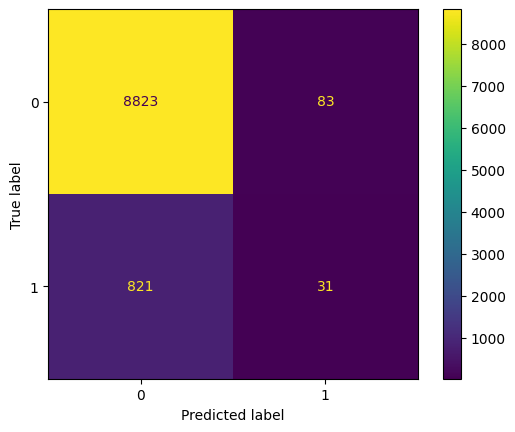

In [20]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

As linhas trazem a informação "true label", que indica os valores reais da nossa base de dados, ou seja, são os valores y_val. Nas colunas, encontramos a informação "predict label", que representa a quantidade de valores previstos pelo modelo. Nesse sentido, o modelo utilizou as variáveis explicativas para realizar uma classificação, identificando a classe com base no conhecimento do modelo, e armazenou as informações na matriz de confusão, nas colunas.

Além disso, encontramos o valor 0 na primeira linha e o valor 1 na segunda coluna. O valor 0 indica os clientes adimplentes, isto é, os que pagam em dia. Já o valor 1 representa os clientes inadimplentes, que não estão quitando o empréstimo.

Esses são os valores reais, correspondendo à quantidade de pessoas realmente adimplentes ou inadimplentes.

Nas colunas, temos a quantidade, na primeira coluna, de clientes adimplentes baseados na classificação do modelo. Assim, se somarmos essa primeira coluna, obteremos a quantidade de classificações pelo modelo que foram identificadas como adimplentes. Na segunda coluna, encontramos a quantidade de clientes inadimplentes identificados pelo modelo. Ao cruzar esses resultados, poderemos verificar quantos acertos e erros o modelo obteve.

Para melhorar a visualização, alteraremos o nome do 0 e do 1 para "adimplente" e "inadimplente", respectivamente, facilitando a identificação de acertos e erros.

Para isso, copiaremos o código dessa célula, colaremos na célula abaixo e adicionaremos um parâmetro adicional no Confusion Matrix Display. Logo após confusion_matrix, incluiremos display_labels = ['Adimplente', 'Inadimplente']. Execute essa célula para ver o resultado.

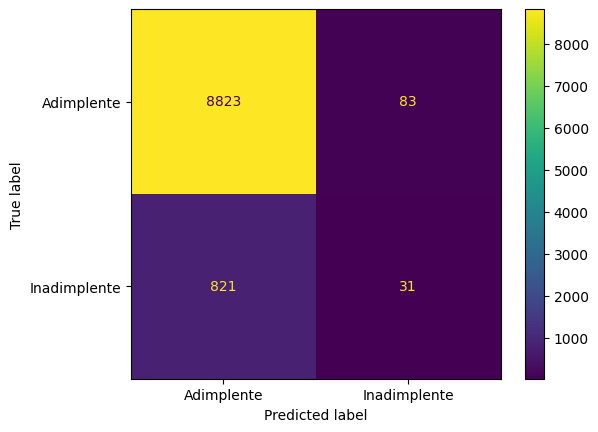

In [21]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

Agora, está mais fácil identificar os valores dessa matriz de confusão. Consegue-se perceber, por exemplo, que o primeiro valor onde está escrito "1e+04" indica uma notação científica. Então esse valor é "10^4", que seria 10.000. Dessa forma, temos 10.000 clientes que são adimplentes, de acordo com a linha de valores reais, e que o modelo também classificou como adimplentes. O modelo acertou nesses 10.000 clientes.

Já o valor de 958, que está na segunda linha e na primeira coluna, representa as pessoas verdadeiramente inadimplentes que foram classificadas como adimplentes pelo modelo. Ou seja, o modelo errou ao classificá-las como adimplentes, isto é, que elas pagariam o empréstimo, quando, na realidade, não pagariam.

Algo semelhante ocorre com o valor 121, no canto superior direito. Esse é o número de clientes que o modelo classificou como inadimplentes, mas que eram adimplentes. Eles pagariam, mas o modelo sugeriu que eles não pagariam. Portanto, o modelo errou novamente, porém de maneira diferente.

Por fim, temos o valor "44", no canto inferior direito. Esse valor corresponde aos clientes que são realmente inadimplentes e que o modelo também classificou como inadimplentes. Portanto, o modelo acertou nesse caso.

Podemos ver que nosso modelo não está apresentando resultados tão bons quanto esperávamos. Embora a acurácia tenha obtido uma taxa de acerto de 90%, ao identificarmos os clientes inadimplentes, notamos que ele identificou apenas 44 deles.

Se somássemos o número real de pessoas inadimplentes, teríamos mais de mil. Portanto, nosso modelo não está sendo capaz de resolver o problema que pretendemos solucionar, que é identificar corretamente as pessoas inadimplentes que não estão pagando o empréstimo do veículo.

A matriz de confusão se provou muito útil para identificarmos que a acurácia não é uma métrica que sempre precisamos utilizar. Ela não é a mais importante, pois não vai nos ajudar a entender todas as nuances do nosso modelo. Além disso, a matriz de confusão também foi importante para identificar que o modelo não está classificando bem as pessoas inadimplentes.

A pergunta que fica é: será que conseguimos extrair métricas a partir dos valores na matriz de confusão, assim como fizemos com a acurácia, que possam nos ajudar melhor com o nosso problema? Vamos explorar isso em nossa próxima aula.

### Para saber mais: entendendo a matriz de confusão

Para obter uma avaliação mais completa do desempenho de modelos de classificação, podemos utilizar uma ferramenta conhecida como matriz de confusão. Essa matriz oferece vantagens à pessoa cientista de dados, pelo fato de permitir entender qual a quantidade de erros e acertos das previsões de um modelo. Ao invés de uma taxa de acerto geral, a matriz é capaz de fornecer informações em uma visualização para cada uma das categorias da variável alvo.

Pense em um sistema de segurança de um prédio que utiliza câmeras para identificar pessoas entrando. A "matriz de confusão" se torna valiosa, pois possibilita verificar quantas vezes o sistema acertou ao identificar corretamente as pessoas autorizadas, quantas vezes acusou erroneamente pessoas e quantas vezes deixou passar pessoas não autorizadas. Com esses números, é possível ajustar o sistema para minimizar falsos positivos e negativos, melhorando sua precisão na detecção de visitantes.

Na representação geral de uma matriz de confusão, para mais detalhes analise a imagem a seguir, as linhas da matriz correspondem aos valores reais da base de dados, enquanto as colunas correspondem aos valores previstos pelo modelo de classificação. As categorias da variável alvo são representadas pelo valor 0 (ausência do atributo), também chamado de negativo, e pelo valor 1 (presença do atributo), também chamado de positivo.

<img src='' alt='Imagem de uma matriz de duas linhas e duas colunas. As linhas representam os valores reais e as colunas representam os valores previstos. A primeira linha e primeira coluna, da esquerda para a direita, está em verde. São os “verdadeiros negativos”, onde o valor real e previsto é 0. A primeira linha e segunda coluna, em vermelho, são os “falsos positivos”, onde o valor real é 0 e valor previsto é 1. A segunda linha e primeira coluna, em vermelho, são os “falsos negativos”, onde o valor real é 1 e valor previsto é 0. A segunda linha e segunda coluna, em verde, são os “verdadeiros positivos”, onde o valor real é 1 e valor previsto é 1.' />

Cada elemento da matriz é identificado por um nome de acordo com o cruzamento entre a previsão e o valor real. A diagonal principal da matriz, que está destacada pela cor verde, representa os elementos que tem a previsão igual ao valor real, portanto são os acertos do modelo. Já a diagonal secundária, que está destacada pela cor vermelha, representa os elementos com previsões diferentes do valor real, portanto são os erros do modelo. A descrição de cada um dos elementos é a seguinte:

Verdadeiros Negativos (VN): Quando o valor real for 0 e a predição também for 0. Indica que o modelo classificou corretamente os valores da classe negativa.
Falsos Positivos (FP): Quando o valor real for 0 e a predição for 1. Indica que o modelo classificou erroneamente um elemento da classe negativa como se fosse da classe positiva.
Falsos Negativos (FN): Quando o valor real for 1 e a predição for 0. Indica que o modelo classificou erroneamente um elemento da classe positiva como se fosse da classe negativa.
Verdadeiros Positivos (VP): Quando o valor real for 1 e a predição também for 1. Indica que o modelo classificou corretamente os valores da classe positiva.
Esses valores são muito úteis para uma análise mais aprofundada do modelo de classificação. Isso permite identificar as capacidades e limitações da predição, se há um equilíbrio entre os acertos e erros ou se o resultado está tendencioso para uma classe em detrimento da outra. Com isso, é nítido que a matriz de confusão é uma ferramenta muito mais completa do que a métrica de acurácia, que representa apenas a porcentagem de acerto do modelo, sem considerar as classes de maneira isolada.